# Time Series Forecasting with Python (SARIMA, LSTM, BPNN, Neural ODEs.)

## Group: Minter


### Table of Contents
- <a href="#step1">1: Library/Package and data Loading</a>
- <a href="#step2">2: SARIMA</a>
- <a href="#step3">3: LSTM</a>
- <a href="#step4">4: BPNN</a>
- <a href="#step5">5: NEURAL ODES</a>
- <a href="#step6">6: Results</a>


<h3>1. Library and data loading</h3>
<a id="step1"></a>

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 

#from pmdarima import auto_arima 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

#from random import seed

In [2]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# FORECAST

## Read Dataset

In [3]:
#Test dataset
df = pd.read_csv('../beer.csv')

In [4]:
#Outputs the first five rows of the datasaet
df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
Month                      476 non-null object
Monthly beer production    476 non-null float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [6]:
#Chahging the month col to datetime from object/string
df.Month = pd.to_datetime(df.Month)

In [7]:
#sets the index of  the dataframe to month col
df = df.set_index("Month")
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [8]:
#Sets the frequency as montly
df.index.freq = 'MS'

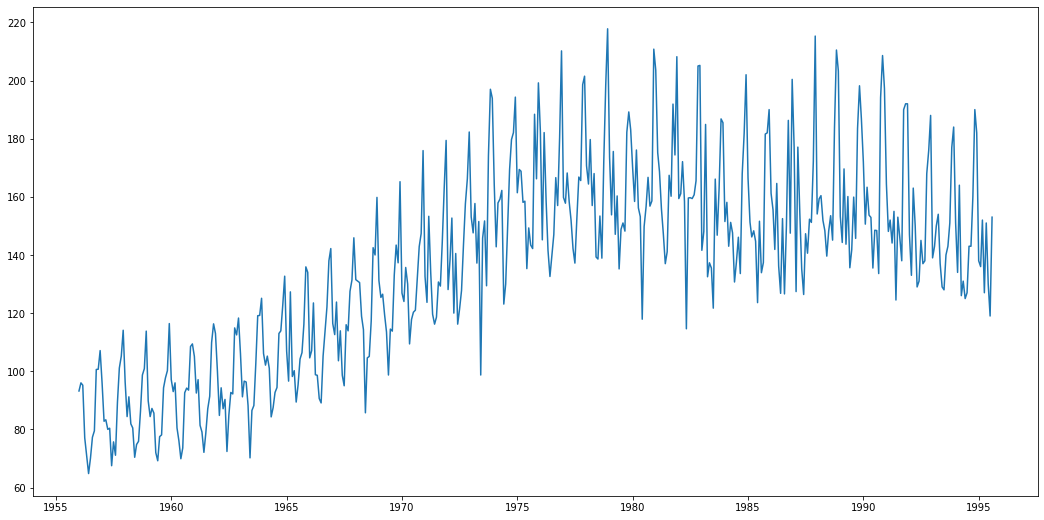

In [9]:
#Plots the original dataset
plt.figure(figsize=(18,9))
plt.plot(df.index, df["Monthly beer production"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show();

## SARIMA Forecast
<a id="step2"></a>

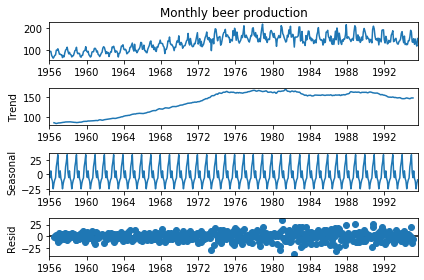

In [10]:
#Firstly, we take a closer look at the dataset
a = seasonal_decompose(df["Monthly beer production"], model = "add")
a.plot();

In [11]:
#We run auto_arima() function to get best p,d,q,P,D,Q values
#Then, we use sarimax to account for seasonality and then forecasting
#building the model

from pmdarima.arima import auto_arima

model = auto_arima(df['Monthly beer production'],trace=True, error_action='ignore', suppress_warnings=True, seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()
#model.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (2, 1, 2)x(1, 0, 1, 12) (constant=True); AIC=3556.276, BIC=3589.583, Time=2.550 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 12) (constant=True); AIC=4180.337, BIC=4188.663, Time=0.031 seconds
Fit ARIMA: (1, 1, 0)x(1, 0, 0, 12) (constant=True); AIC=3905.859, BIC=3922.512, Time=0.379 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 1, 12) (constant=True); AIC=3940.279, BIC=3956.933, Time=0.526 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 12) (constant=False); AIC=4178.356, BIC=4182.520, Time=0.016 seconds
Fit ARIMA: (2, 1, 2)x(0, 0, 1, 12) (constant=True); AIC=3897.413, BIC=3926.557, Time=1.251 seconds
Fit ARIMA: (2, 1, 2)x(1, 0, 0, 12) (constant=True); AIC=3682.527, BIC=3711.670, Time=2.579 seconds
Near non-invertible roots for order (2, 1, 2)(1, 0, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.994)
Fit ARIMA: (2, 1, 2)x(2, 0, 1, 12) (constant=True); AIC=3556.158, BIC=3593.628, Time=9.575 seconds
Fit A

In [12]:
#Prints the model results
model

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  476
Model:             SARIMAX(2, 1, 3)x(3, 0, [1], 12)   Log Likelihood               -1738.363
Date:                              Fri, 06 Mar 2020   AIC                           3498.727
Time:                                      16:52:20   BIC                           3544.523
Sample:                                           0   HQIC                          3516.736
                                              - 476                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0014      0.018      0.075      0.941      -0.035       0.037
ar.L1         -1.1474      0.005   -212.842      0.000      -1.158      -1.137
ar.L2         -0.9905      0.006   -175.921      0.000      -1.001      -0.979
ma.L1          0.2144      0.024      9.053      0.000       0.168       0.261
ma.L2         -0.0110      0.023     -0.473      0.636      -0.057       0.035
ma.L3         -0.8643      0.022    -39.142      0.000      -0.908      -0.821
ar.S.L12       0.9670      0.084     11.499      0.000       0.802       1.132
ar.S.L24       0.0102      0.053      0.193      0.847      -0.093       0.114
ar.S.L36       0.0139      0.063      0.218      0.827      -0.111       0.138
ma.S.L12      -0.7597      0.072    -10.576      0.000      -0.900      -0.619
sigma2        80.4888      4.288     18.771      0.000      72.084      88.893
===================================================================================
Ljung-Box (Q):                       60.27   Jarque-Bera (JB):                37.27
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               3.28   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

As we can see best arima model chosen by auto_arima() is SARIMAX(2, 1, 3)x(3, 0, [1], 12)


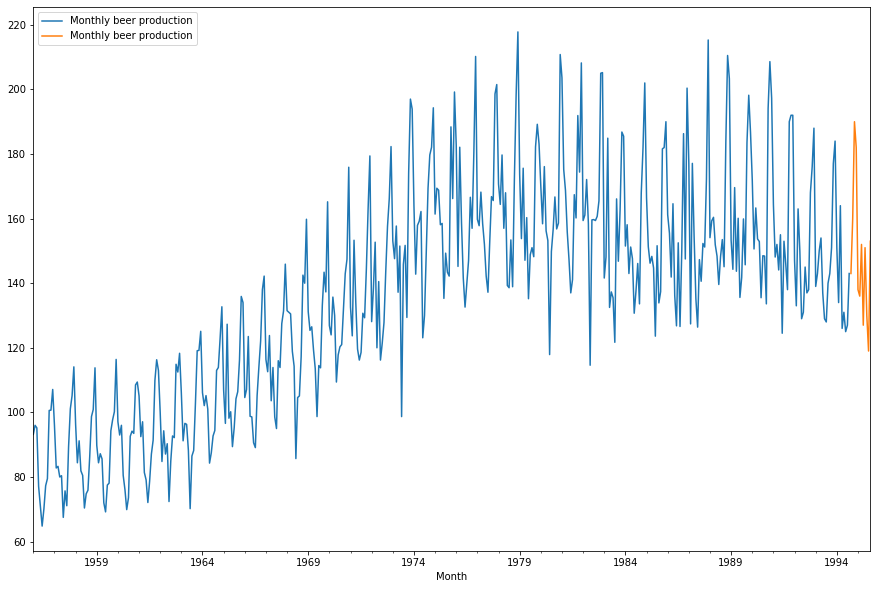

In [13]:
#Let's split the data into train and test set
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

#plotting the data
ax = train_data.plot(figsize=(15,10))
test_data.plot(ax=ax,figsize=(15,10))

In [14]:
#Building the SARIMAX Model to account for seasonality
sarima_model = SARIMAX(train_data['Monthly beer production'], order = (2,1,3), seasonal_order = (3,0,1,12))
sarima_model = sarima_model.fit()
sarima_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Monthly beer production   No. Observations:                  464
Model:             SARIMAX(2, 1, 3)x(3, 0, [1], 12)   Log Likelihood               -1696.830
Date:                              Fri, 06 Mar 2020   AIC                           3413.661
Time:                                      16:53:07   BIC                           3455.038
Sample:                                  01-01-1956   HQIC                          3429.950
                                       - 08-01-1994                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1474      0.006   -195.379      0.000      -1.159      -1.136
ar.L2         -0.9900      0.006   -159.927      0.000      -1.002      -0.978
ma.L1          0.2339      0.028      8.405      0.000       0.179       0.288
ma.L2          0.0046      0.027      0.170      0.865      -0.049       0.058
ma.L3         -0.8492      0.026    -32.726      0.000      -0.900      -0.798
ar.S.L12       0.9902      0.085     11.703      0.000       0.824       1.156
ar.S.L24      -0.0007      0.056     -0.013      0.989      -0.111       0.109
ar.S.L36       0.0014      0.065      0.022      0.983      -0.125       0.128
ma.S.L12      -0.7979      0.071    -11.269      0.000      -0.937      -0.659
sigma2        84.9948      4.804     17.691      0.000      75.578      94.411
===================================================================================
Ljung-Box (Q):                       61.32   Jarque-Bera (JB):                34.50
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               3.62   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
#As the model was built, fitting and trained, now we can predict the results
sarima_pred = sarima_model.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("SARIMA_Predictions")

#Prints the results
sarima_pred

1994-09-01    134.293657
1994-10-01    157.309365
1994-11-01    179.513538
1994-12-01    181.046413
1995-01-01    141.118947
1995-02-01    139.809655
1995-03-01    148.231855
1995-04-01    133.587761
1995-05-01    137.396828
1995-06-01    117.959310
1995-07-01    129.173126
1995-08-01    140.513117
Freq: MS, Name: SARIMA_Predictions, dtype: float64

In [16]:
test_data['SARIMA_Predictions'] = sarima_pred

In [17]:
#Compares the oirginal dataset to the predicted data using the SARIMA model
test_data

,Monthly beer production,SARIMA_Predictions
Month,,
1994-09-01,143.0,134.293657
1994-10-01,160.0,157.309365
1994-11-01,190.0,179.513538
1994-12-01,182.0,181.046413
1995-01-01,138.0,141.118947
1995-02-01,136.0,139.809655
1995-03-01,152.0,148.231855
1995-04-01,127.0,133.587761
1995-05-01,151.0,137.396828


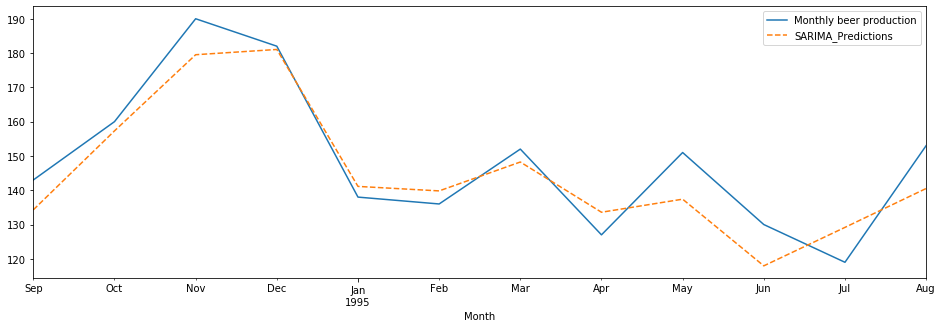

In [18]:
#Ploting the predicted data aginst the original dataset for the test data
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
sarima_pred.plot(legend = True,linestyle="--");

In [19]:
#Errors which would be used to esitmate a model accuarcy

sarima_rmse_error = rmse(test_data['Monthly beer production'],test_data['SARIMA_Predictions'])
#sarima_rmse_error = mean_squared_error(test_data['Monthly beer production'],test_data['SARIMA_Predictions'], squared=False)

sarima_mse_error = sarima_rmse_error**2
#sarima_mse_error = mean_squared_error(test_data['Monthly beer production'],test_data['SARIMA_Predictions'])

sarima_mae_error = mean_absolute_error(test_data['Monthly beer production'],test_data['SARIMA_Predictions'])
sarima_mape_error = mean_absolute_percentage_error(test_data['Monthly beer production'],test_data['SARIMA_Predictions'])

mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {sarima_mse_error}\nRMSE Error: {sarima_rmse_error}\nMAE: {sarima_mae_error}\nMAPE: {sarima_mape_error}\nMean: {mean_value}')



MSE Error: 72.09943374036506
RMSE Error: 8.491138542054596
MAE: 7.368783860594417
MAPE: 5.126809747749793
Mean: 136.3953781512605


## LSTM Forecast
<a id="step3"></a>

In [20]:
#loading libraies for LSTM and BPNN 
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

#First we'll scale our train and test data with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [21]:
#we scale the data to normalise the figues in order to utilize them as we cannot we them as natural numbers
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [22]:
#Before creating LSTM model we should create a Time Series Generator object.

n_input = 12
n_features= 1
generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [23]:
#building the LSTM model
lstm_model = tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(tf.keras.layers.Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

#printing the model resulst
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [24]:
#Fitting the model using the generator previouslt created
lstm_model.fit_generator(generator,epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 452 steps
Epoch 1/20
452/452 [==============================] - 6s 12ms/step - loss: 0.0238
Epoch 2/20
452/452 [==============================] - 6s 13ms/step - loss: 0.0154: 0s - loss: 0
Epoch 3/20
452/452 [==============================] - 5s 12ms/step - loss: 0.0125
Epoch 4/20
452/452 [==============================] - 5s 10ms/step - loss: 0.0092
Epoch 5/20
452/452 [==============================] - 5s 10ms/step - loss: 0.0080
Epoch 6/20
452/452 [==============================] - 5s 11ms/step - loss: 0.0072
Epoch 7/20
452/452 [==============================] - 5s 10ms/step - loss: 0.0067
Epoch 8/20
452/452 [==============================] - 5s 11ms/step - loss: 0.0067
Epoch 9/20
452/452 [==============================] - 5s 11ms/step - loss: 0.0068
Epoch 10/20
452/452 [==============================] - 5s 11ms/step - loss: 0.0073
Epoch 11/20
452/452 [=======================

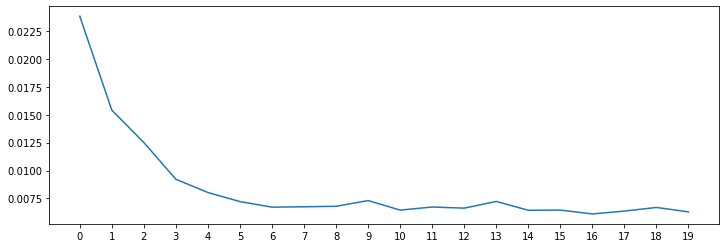

In [25]:
#Plotting the losses from each epoch iteration
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [26]:
#Batch training the model 
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [27]:
#Printing the results of the training loop
lstm_predictions_scaled

[array([0.509858], dtype=float32),
 array([0.58865505], dtype=float32),
 array([0.7121768], dtype=float32),
 array([0.71838796], dtype=float32),
 array([0.54723936], dtype=float32),
 array([0.5168161], dtype=float32),
 array([0.58224237], dtype=float32),
 array([0.44180527], dtype=float32),
 array([0.44302967], dtype=float32),
 array([0.42128876], dtype=float32),
 array([0.44363558], dtype=float32),
 array([0.4945834], dtype=float32)]

In [28]:
#As you know we scaled our data that's why we have to inverse it to see true predictions.
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [29]:
#prints inverse results
lstm_predictions

array([[142.80827587],
       [154.86422335],
       [173.76305037],
       [174.71335809],
       [148.52762257],
       [143.87286018],
       [153.88308256],
       [132.39620681],
       [132.5835398 ],
       [129.25718005],
       [132.67624419],
       [140.47125991]])

In [30]:
test_data['LSTM_Predictions'] = lstm_predictions

In [31]:
#Comparison of models  
test_data

,Monthly beer production,SARIMA_Predictions,LSTM_Predictions
Month,,,
1994-09-01,143.0,134.293657,142.808276
1994-10-01,160.0,157.309365,154.864223
1994-11-01,190.0,179.513538,173.763050
1994-12-01,182.0,181.046413,174.713358
1995-01-01,138.0,141.118947,148.527623
1995-02-01,136.0,139.809655,143.872860
1995-03-01,152.0,148.231855,153.883083
1995-04-01,127.0,133.587761,132.396207
1995-05-01,151.0,137.396828,132.583540


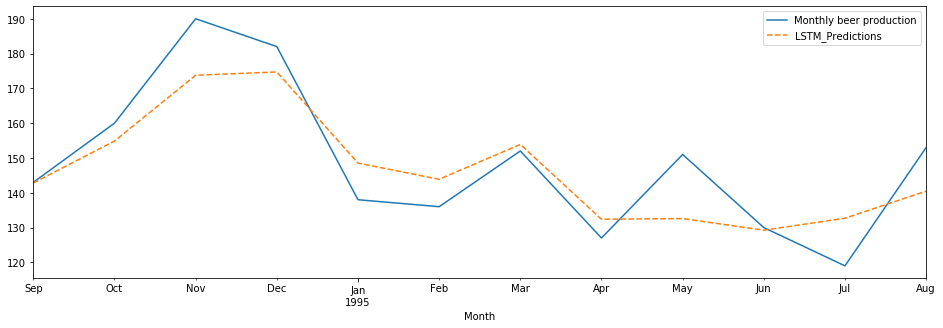

In [32]:
#Plotting LSTM model againts the original test data
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
test_data['LSTM_Predictions'].plot(legend = True,linestyle="--");

In [33]:
#Errors which would be used to esitmate a model accuarcy

lstm_rmse_error = rmse(test_data['Monthly beer production'], test_data["LSTM_Predictions"])
#lstm_rmse_error = mean_squared_error(test_data['Monthly beer production'],test_data["LSTM_Predictions"], squared= False)

lstm_mse_error = lstm_rmse_error**2
#lstm_mse_error = mean_squared_error(test_data['Monthly beer production'],test_data["LSTM_Predictions"])

lstm_mae_error = mean_absolute_error(test_data['Monthly beer production'],test_data["LSTM_Predictions"])
lstm_mape_error = mean_absolute_percentage_error(test_data['Monthly beer production'],test_data["LSTM_Predictions"])

mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMAE: {lstm_mae_error}\nMAPE: {lstm_mape_error}\nMean: {mean_value}')

MSE Error: 102.69593558141821
RMSE Error: 10.133900314361604
MAE: 8.324594072500863
MAPE: 5.603989135800791
Mean: 136.3953781512605


## BPNN Forecast
<a id="step4"></a>

In [34]:
#As we previously loaded the libraies we required and sacled the dataset already
#We begin by building the NN model, Uisng 1 input layer, 1 hidden layer and 1 output layer 

bp_model = tf.keras.Sequential()
bp_model.add(tf.keras.layers.Dense(200,activation='relu', input_shape=(n_input, n_features)))
bp_model.add(tf.keras.layers.Dense(100, activation='relu'))
bp_model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
bp_model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

#prints the model results
bp_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12, 200)           400       
_________________________________________________________________
dense_2 (Dense)              (None, 12, 100)           20100     
_________________________________________________________________
dense_3 (Dense)              (None, 12, 1)             101       
Total params: 20,601
Trainable params: 20,601
Non-trainable params: 0
_________________________________________________________________


In [35]:
#Fitting the model using the generator previously created
bp_model.fit_generator(generator,epochs=20)

  ...
    to  
  ['...']
Train for 452 steps
Epoch 1/20
452/452 [==============================] - 2s 4ms/step - loss: 0.6907 - accuracy: 0.0000e+00
Epoch 2/20
452/452 [==============================] - 1s 2ms/step - loss: 0.6829 - accuracy: 0.0013
Epoch 3/20
452/452 [==============================] - 1s 2ms/step - loss: 0.6752 - accuracy: 0.0017
Epoch 4/20
452/452 [==============================] - 1s 2ms/step - loss: 0.6679 - accuracy: 0.0013
Epoch 5/20
452/452 [==============================] - 1s 2ms/step - loss: 0.6614 - accuracy: 0.0017
Epoch 6/20
452/452 [==============================] - 1s 2ms/step - loss: 0.6559 - accuracy: 0.0017
Epoch 7/20
452/452 [==============================] - 1s 2ms/step - loss: 0.6517 - accuracy: 0.0017
Epoch 8/20
452/452 [==============================] - 1s 2ms/step - loss: 0.6485 - accuracy: 0.0017
Epoch 9/20
452/452 [==============================] - 1s 2ms/step - loss: 0.6466 - accuracy: 0.0017
Epoch 10/20
452/452 [==============================

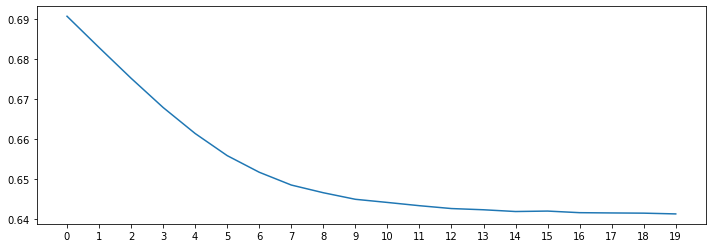

In [36]:
#Plotting the losses across epoch cycles
losses_bp = bp_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_bp)),losses_bp);

In [37]:
bp_predictions_scaled = list()

In [38]:
#Batch training the model
batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    bp_pred = bp_model.predict(current_batch)[0][i]
    bp_predictions_scaled.append(bp_pred) 

In [39]:
#Training results
bp_predictions_scaled

[array([0.52077746], dtype=float32),
 array([0.54930264], dtype=float32),
 array([0.638905], dtype=float32),
 array([0.6617212], dtype=float32),
 array([0.54930264], dtype=float32),
 array([0.47633544], dtype=float32),
 array([0.59489393], dtype=float32),
 array([0.42989257], dtype=float32),
 array([0.45886263], dtype=float32),
 array([0.42414927], dtype=float32),
 array([0.43565476], dtype=float32),
 array([0.52077746], dtype=float32)]

In [40]:
#As we scaled the data, we now have to inverse it to see true predictions.
bp_predictions = scaler.inverse_transform(bp_predictions_scaled)

In [41]:
#Prediction results
bp_predictions

array([[144.47895198],
       [148.84330355],
       [162.55246328],
       [166.04334812],
       [148.84330355],
       [137.67932172],
       [155.81877165],
       [130.57356318],
       [135.00598277],
       [129.69483905],
       [131.45517819],
       [144.47895198]])

In [42]:
test_data['BP_Predictions'] = bp_predictions

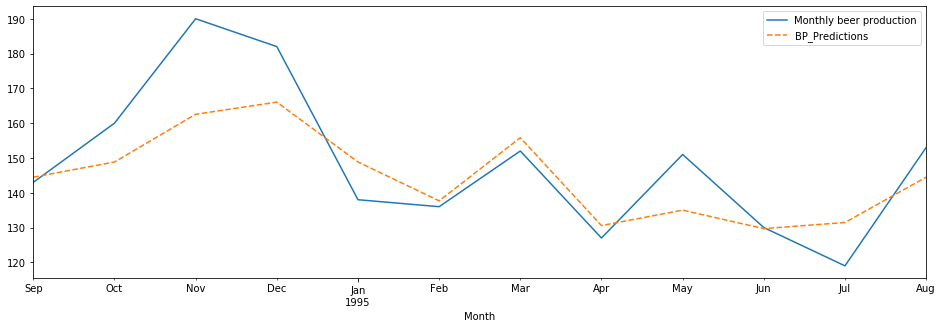

In [43]:
#Plotting the BPNN model againts the original test data
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)
test_data['BP_Predictions'].plot(legend = True,linestyle="--");

In [44]:
#Errors which would be used to esitmate a model accuarcy

bp_rmse_error = rmse(test_data['Monthly beer production'], test_data["BP_Predictions"])
#bp_rmse_error = mean_squared_error(test_data['Monthly beer production'],test_data["BP_Predictions"], squared= False)

bp_mse_error = bp_rmse_error**2
#bp_mse_error = mean_squared_error(test_data['Monthly beer production'],test_data["BP_Predictions"])

bp_mae_error = mean_absolute_error(test_data['Monthly beer production'],test_data["BP_Predictions"])
bp_mape_error = mean_absolute_percentage_error(test_data['Monthly beer production'],test_data["BP_Predictions"])

mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {bp_mse_error}\nRMSE Error: {bp_rmse_error}\nMAE: {bp_mae_error}\nMAPE: {bp_mape_error}\nMean: {mean_value}')

MSE Error: 147.16944525550065
RMSE Error: 12.131341445013435
MAE: 9.43585012604793
MAPE: 6.0418103006527835
Mean: 136.3953781512605


## Neural ODEs Forecast
<a id="step5"></a>

## RESULTS
<a id="step6"></a>

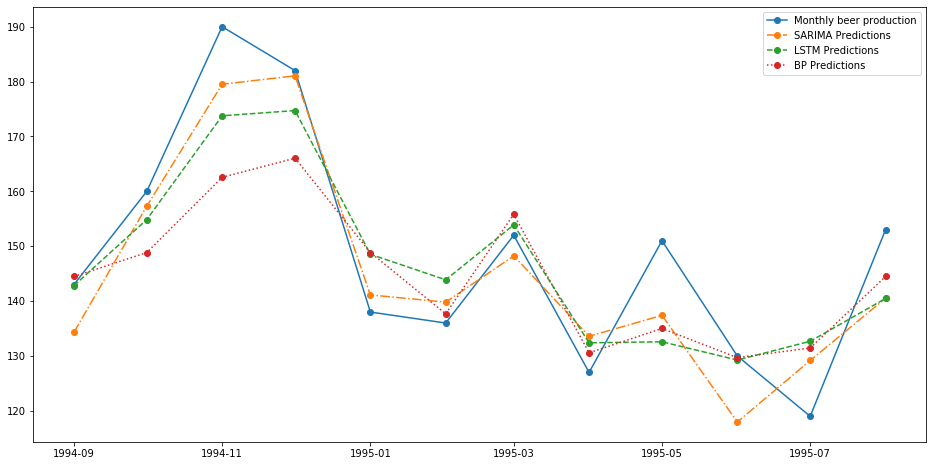

In [45]:
#####---Final Prediction of all models

#Plotting all models against each other
plt.figure(figsize=(16,8))
plt.plot_date(test_data.index, test_data["Monthly beer production"], label="Monthly beer production",linestyle="-")
plt.plot_date(test_data.index, test_data["SARIMA_Predictions"], label="SARIMA Predictions",linestyle="-.")
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], label="LSTM Predictions",linestyle="--")
plt.plot_date(test_data.index, test_data["BP_Predictions"], label="BP Predictions",linestyle=":")
plt.legend()
plt.show()

In [52]:
###########----Errors
#Creating a list of all errors previously calcuated
rmse_errors = [sarima_rmse_error, lstm_rmse_error, bp_rmse_error]
mse_errors = [sarima_mse_error, lstm_mse_error, bp_mse_error]
mae_errors = [sarima_mae_error, lstm_mae_error, bp_mae_error]
mape_errors = [sarima_mape_error, lstm_mape_error, bp_mape_error]

#creating a new df to store the errors accordingly 
errors = pd.DataFrame({"Models" : ["SARIMA", "LSTM", "BP"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors, "MAE Errors" : mae_errors, "MAPE Errors" : mape_errors})

#printing the mean of the original dataset
print(f"Mean: {test_data['Monthly beer production'].mean()}")

#setting the inde of the new df to Models
errors = errors.set_index("Models")

#printing the results of all models for comparison
errors

Mean: 148.41666666666666


,RMSE Errors,MSE Errors,MAE Errors,MAPE Errors
Models,,,,
SARIMA,8.491139,72.099434,7.368784,5.126810
LSTM,10.133900,102.695936,8.324594,5.603989
BP,12.131341,147.169445,9.435850,6.041810


In [53]:
#Lastly, we print the predictions from all models for the period of the test data against the original 
test_data

,Monthly beer production,SARIMA_Predictions,LSTM_Predictions,BP_Predictions
Month,,,,
1994-09-01,143.0,134.293657,142.808276,144.478952
1994-10-01,160.0,157.309365,154.864223,148.843304
1994-11-01,190.0,179.513538,173.763050,162.552463
1994-12-01,182.0,181.046413,174.713358,166.043348
1995-01-01,138.0,141.118947,148.527623,148.843304
1995-02-01,136.0,139.809655,143.872860,137.679322
1995-03-01,152.0,148.231855,153.883083,155.818772
1995-04-01,127.0,133.587761,132.396207,130.573563
1995-05-01,151.0,137.396828,132.583540,135.005983
